<a href="https://colab.research.google.com/github/utkarxhh/Python_exercises/blob/main/svmimplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

In [4]:
df=pd.read_csv("cell_samples.csv")

In [5]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
df.shape

(699, 11)

In [32]:
df.size

7513

In [8]:
df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [7]:
df["Class"].value_counts()
#two type of value in class

2    458
4    241
Name: Class, dtype: int64

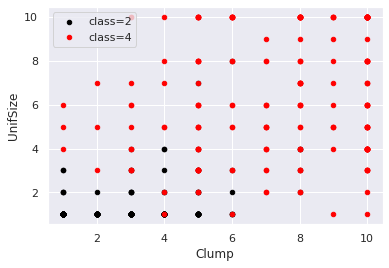

In [25]:
two_df=df[df["Class"]==2][0:200]
four_df=df[df["Class"]==4][0:200]
axes=two_df.plot(kind="scatter",x="Clump",y="UnifSize",color="black",label="class=2")
four_df.plot(kind="scatter",x="Clump",y="UnifSize",color="red",label="class=4",ax=axes)

In [26]:
df=df[pd.to_numeric(df["BareNuc"],errors="coerce").notnull()]
df["BareNuc"]=df["BareNuc"].astype("int")

In [33]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [35]:
df.columns
new_df=df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
x=np.asarray(new_df)
y=np.asarray(df['Class'])

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [37]:
#modeling svm
from sklearn import svm
classifier=svm.SVC(kernel="linear",gamma='auto',C=2)
classifier.fit(x_train,y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
y_predict=classifier.predict(x_test)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

